In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 6'

In [3]:
X_train = pd.read_csv('train_images.csv')
y_train = pd.read_csv('train_labels.csv')

X_test = pd.read_csv('test_images.csv')
y_test = pd.read_csv('test_labels.csv')

In [4]:
X_train.head()

,95,101,99,103,95.1,86,96,89,70,104,...,111.214,107.329,92.354,89.258,103.379,99.414,117.112,116.103,118.82,96.423
0,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
1,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
2,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
3,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
4,79,95,90,82,73,74,77,75,82,87,...,90,80,79,78,65,71,62,97,89,73


In [4]:
X_train.shape, y_train.shape

((6999, 12100), (7000, 4))

In [5]:
X_test.shape, y_test.shape

((2733, 12100), (2734, 4))

In [6]:
y_train.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


So we have 6999 flatten images that contain 12100 pixels in train set and 2734 in the test set. 
But we have some big problem here. For train data, we have 6999 images but in labels, we have 7000 labels so there must be one missing image.

If we check above the X_train.head part we can see clearly that the column names are our missing image's pixels. The problem is the indexing of the X_train and X_test and we must reindex this

In [7]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index
    
XFix(X_train)
XFix(X_test)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 12100), (7000, 4), (2734, 12100), (2734, 4))

Text(0.5, 1.0, 'volcanoes in testing set')

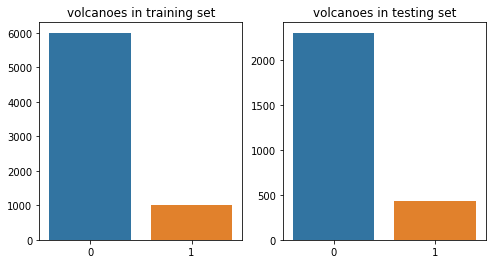

In [9]:
#Let us see how many images on the train and test set have volacanoes
train_counts =y_train['Volcano?'].value_counts()
test_counts = y_test['Volcano?'].value_counts()

plt.figure(figsize = (8,4))
plt.subplot(121)
sns.barplot(train_counts.index, train_counts.values)
plt.title('volcanoes in training set')
plt.subplot(122)
sns.barplot(test_counts.index, test_counts.values)
plt.title('volcanoes in testing set')

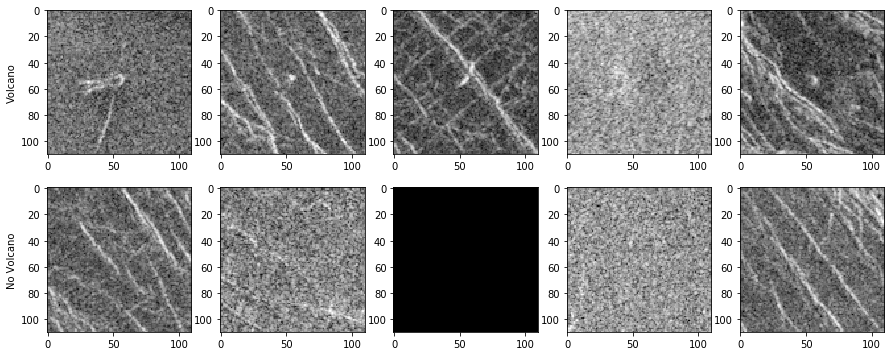

In [10]:
positive_samples = X_train[y_train['Volcano?'] == 1].sample(5)
negative_samples = X_train[y_train['Volcano?'] == 0].sample(5)

plt.subplots(figsize = (15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(positive_samples.iloc[i,:].values.reshape((110, 110)), cmap = 'gray')
    if i == 0: plt.ylabel('Volcano')
for i in range(5):
    plt.subplot(2,5,i+6)
    if i == 0: plt.ylabel('No Volcano')
    plt.imshow(negative_samples.iloc[i,:].values.reshape((110,110)), cmap = 'gray')

Let us normalize the pixel values between 0 and 1

In [12]:
X_train_raw= X_train/256
y_train_raw = y_train['Volcano?']
X_test_raw = X_test/256
y_test_raw = y_test['Volcano?']

Let us split the training set to train and evaluate sets and translate the 7000 images 1D to 2D

In [14]:
from sklearn.model_selection import train_test_split
img_rows, img_cols = 110, 110

X = X_train_raw.values.reshape((-1, img_rows, img_cols, 1))
y = y_train_raw.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 3)

X_test = X_test_raw.values.reshape((-1, img_rows, img_cols, 1))
y_test = y_test_raw.values

Building our neural network

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

#Import the backend
from keras import backend as K

Using TensorFlow backend.


1. Multi Layer Perceptron

We will start with a simple sequential model using two dense layers of 128 nodes and 64 nodes respectively with a Rectified Linear Unit activation funcion.

In [16]:
model_dense = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_dense.add(Dense(128, activation='relu', input_shape=(img_rows, img_cols, 1)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Flatten())
model_dense.add(Dense(1, activation='softmax'))


model_dense.summary()


# Compile the model to put it all together.
model_dense.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_dense = model_dense.fit(X_train, y_train,
                          batch_size=128,
                          epochs=1,
                          verbose=1,
                          validation_data=(X_vali, y_vali))
score = model_dense.evaluate(X_vali, y_vali, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 110, 110, 128)     256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
dense_2 (Dense)              (None, 110, 110, 64)      8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 774401    
T

2. Multilayer perceptron

We will now modify our latter model and add four dense layers, being a total of five, having the following nodes: 256, 128, 128, 128, 128, for each layer respectively, with a Rectified Linear Unit activation funcion.

In [16]:
model_deep = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(img_rows, img_cols, 1)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
# End with a number of units equal to the number of classes we have for our outcome
model_deep.add(Flatten())
model_deep.add(Dense(1, activation='softmax'))

model_deep.summary()


# Compile the model to put it all together.
model_deep.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train,
                          batch_size=128,
                          epochs=1,
                          verbose=1,
                          validation_data=(X_vali, y_vali))
score = model_deep.evaluate(X_vali, y_vali, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 110, 110, 256)     512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 256)     0         
_________________________________________________________________
dense_2 (Dense)              (None, 110, 110, 128)     32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
dense_3 (Dense)              (None, 110, 110, 128)     16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 128)     0         
_

Convolutional Neural Network

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout

In [21]:
# kernel_initializer can be tuned for the first conv2D layer
init = keras.initializers.RandomNormal(mean=0, stddev=0.1 )
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(1, activation = 'sigmoid'))

modelCNN1.summary()

# the line bolow can be used for tuning the adam optimizer, e.g. different initial learning rate
# adam = keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# the callBack parameter can be added to model.fit as 'callbacks = [callBack]' for early termination
from keras.callbacks import EarlyStopping
callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')


def reset_weights(model):
    session = keras.backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

epochs = 1
batch_size = 64
reset_weights(modelCNN1)            
history = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali),
                        callbacks=[callBack]
                       )

score = modelCNN1.evaluate(X_vali, y_vali, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 6)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 24)       

In [20]:
# kernel_initializer can be tuned for the first conv2D layer
init = keras.initializers.RandomNormal(mean=0, stddev=0.1 )
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(1, activation = 'sigmoid'))

modelCNN1.summary()

# the line bolow can be used for tuning the adam optimizer, e.g. different initial learning rate
# adam = keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# the callBack parameter can be added to model.fit as 'callbacks = [callBack]' for early termination
from keras.callbacks import EarlyStopping
callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')


def reset_weights(model):
    session = keras.backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

epochs = 10
batch_size = 64
reset_weights(modelCNN1)            
history = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali),
                        callbacks=[callBack]
                       )
score = modelCNN1.evaluate(X_vali, y_vali, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 6)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 24)       

Logitic Regression reducing 2D image to 1D

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
Xtrain, Xvali, ytrain, yvali = train_test_split(X_train_raw, y_train_raw, test_size = 0.3, random_state = 3)
Xtest, ytest = X_test_raw, y_test_raw

lrm = LogisticRegression()

from time import time
start = time()

lrm.fit(Xtrain, ytrain)
end = time()
print('Accuracy score:', lrm.score(Xtrain, ytrain))
print('training time: {} mins.'.format((end-start)/60))

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 0.9993877551020408
training time: 0.29807188113530475 mins.


In [36]:
from sklearn.metrics import classification_report
predVali = lrm.predict(Xvali)
predTest = lrm.predict(Xtest)
print('validation report:','\n',classification_report(yvali, predVali))
print('testing report:', '\n', classification_report(ytest, predTest))

validation report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1798
           1       0.85      0.60      0.70       302

    accuracy                           0.93      2100
   macro avg       0.89      0.79      0.83      2100
weighted avg       0.92      0.93      0.92      2100

testing report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2300
           1       0.86      0.59      0.70       434

    accuracy                           0.92      2734
   macro avg       0.90      0.78      0.83      2734
weighted avg       0.92      0.92      0.91      2734



In [37]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(110, 110, 1))

ValueError: The input must have 3 channels; got `input_shape=(110, 110, 1)`